# [IAPR 2020:][iapr2020] Lab 1 ‒  Image segmentation

**Author:** first name and last name  
**Due date:** 26.03.2020

[iapr2018]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

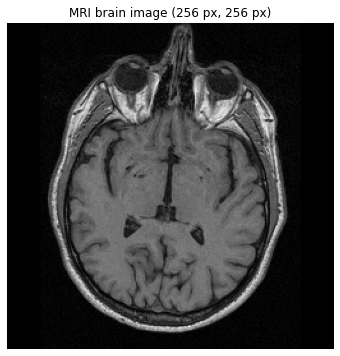

In [2]:
import skimage.io
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

### 1.2 Region growing
Add your implementation and discussion

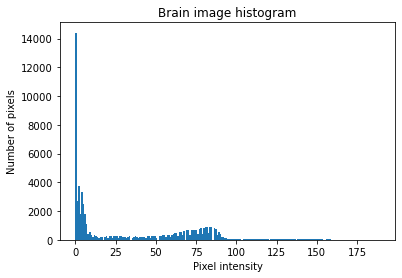

In [3]:
# Histogram
#plt.figure(figsize=(12, 7))
plt.hist(brain_im.ravel(), bins=200)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('Brain image histogram')

plt.show()

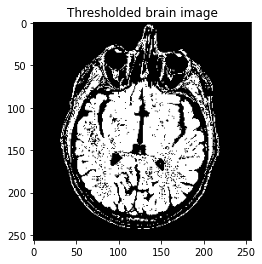

In [4]:
# Manual thresholding

lower_thresh = 55
upper_thresh = 90

brain = (brain_im > lower_thresh) & (brain_im < upper_thresh)

plt.imshow(brain, cmap='gray')
plt.title('Thresholded brain image')

plt.show()

In [5]:
def compute_area(image):
    return np.sum(np.sum(image))

15079


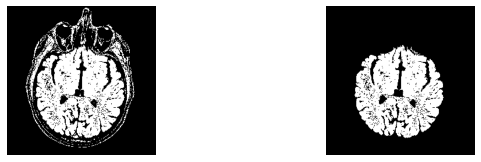

In [6]:
from skimage import measure
from skimage import filters

blobs_labels = measure.label(brain, background=0)

blobs_labels = blobs_labels == blobs_labels[120][120]
print(compute_area(blobs_labels))

plt.figure(figsize=(9, 3.5))
plt.subplot(141)
plt.imshow(brain, cmap='gray')
plt.axis('off')
plt.subplot(143)
plt.imshow(blobs_labels, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()


(-0.5, 255.5, 255.5, -0.5)

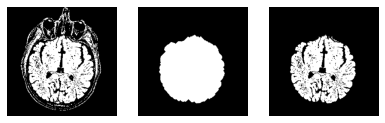

In [7]:
from scipy.ndimage import morphology

brain_closed = morphology.binary_closing(blobs_labels, None, 7)

plt.figure(figsize=(9, 3.5))
plt.subplot(141)
plt.imshow(brain, cmap='gray')
plt.axis('off')
plt.subplot(142)
plt.imshow(brain_closed, cmap='gray')
plt.axis('off')
plt.subplot(143)
plt.imshow(blobs_labels, cmap='gray')
plt.axis('off')

### 1.3 Contour detection
Add your implementation and discussion

(-0.5, 255.5, 255.5, -0.5)

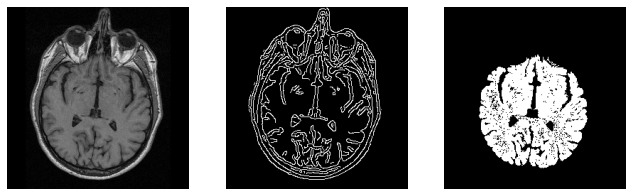

In [8]:
from scipy.ndimage import sobel
from skimage import feature

brain_sobel = feature.canny(brain_im, sigma=1)

plt.figure(figsize=(15, 3.5))
plt.subplot(141)
plt.imshow(brain_im, cmap='gray')
plt.axis('off')
plt.subplot(142)
plt.imshow(brain_sobel, cmap='gray')
plt.axis('off')
plt.subplot(143)
plt.imshow(blobs_labels, cmap='gray')
plt.axis('off')

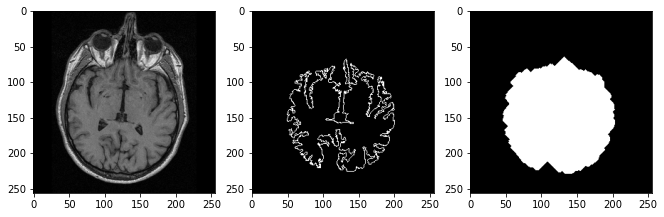

In [9]:
from scipy.ndimage import sobel
from skimage import measure
from scipy import ndimage

contours = measure.find_contours(brain_im, 69)


plt.figure(figsize=(15, 3.5))
plt.subplot(141)

plt.imshow(brain_im, cmap=plt.cm.gray)

longest_contour = max(contours, key=lambda x: len(x))

contour_image = np.zeros(brain_im.shape)

for px in longest_contour:
    contour_image[int(px[0]), int(px[1])] = 1



#for n, contour in enumerate(contours):
ax.plot(longest_contour[:, 1], longest_contour[:, 0], linewidth=2)


plt.subplot(142)
plt.imshow(contour_image, cmap='gray')



plt.subplot(143)

contour_image = ndimage.morphology.binary_dilation(contour_image, None, 3)

# can also use flood fill maybe
contour_image = ndimage.binary_fill_holes(contour_image, structure=np.ones((5,5)))
contour_image = ndimage.morphology.binary_closing(contour_image, None, 15)

plt.imshow(contour_image, cmap='gray')




plt.show()

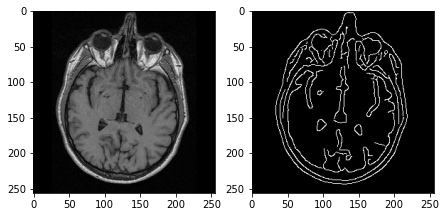

In [10]:
from scipy.ndimage import sobel
from skimage import feature

contours = feature.canny(brain_im, sigma=2)


plt.figure(figsize=(15, 3.5))
plt.subplot(141)
plt.imshow(brain_im , cmap=plt.cm.gray)

plt.subplot(142)
plt.imshow(contours, cmap='gray')


plt.show()






### 1.4 Additional method(s)
Add your implementation and discussion

## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different colors. We ask you to create a routine to:

1. Count the number of shapes of each color.
2. Compute the total area (in pixels) of each color.

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity normalization should probably be used.

**Note:** the routine(s) that you will write for this exercise will be useful for the final project as well, so pay special attention to it.

### 2.1 Visualization

In [11]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  3
Image size: 480, 640 
Number of color channels:  3


In [17]:
def print_all(imgs):

    plt.figure(figsize=(15,4))
    
    plt.subplot(141)
    plt.imshow(imgs[0])
    plt.subplot(142)
    plt.imshow(imgs[1])
    plt.subplot(143)
    plt.imshow(imgs[2])

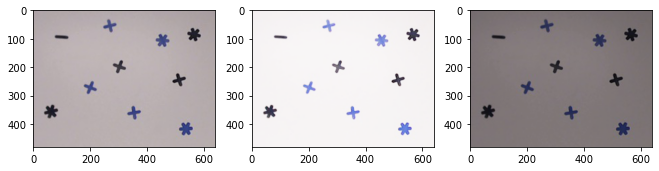

In [18]:
print_all(images)

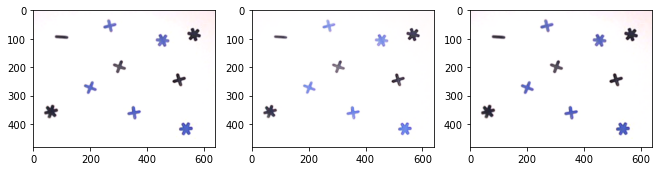

In [20]:
normalized_im = np.zeros(images.shape, dtype='uint8')
for i in range(images.shape[0]):
    fact = 255/images[i][:30,:30].mean()
    normalized_im[i] = np.clip(fact*images[i], 0, 255).astype('uint8')
    
print_all(normalized_im)

### 2.2 Number of shapes of each color
Add your implementation and discussion

10
(480, 640)
[False False  True False  True  True  True False  True False False]
There are 10 shapes in total
Total area of the black blobs is 5284 pixels
Total area of the blue blobs is 5205 pixels
10


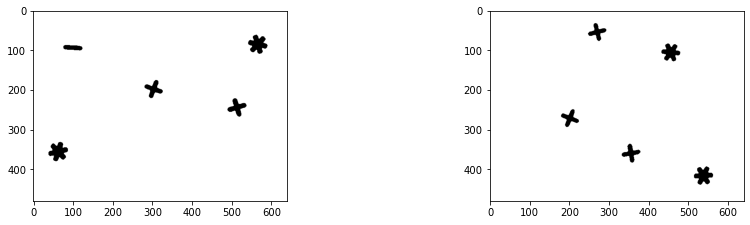

In [69]:
import skimage

thresholded = normalized_im[0].mean(axis=2) < 200

labels, num = skimage.morphology.label(thresholded, return_num=True)

print(num)

print(thresholded.shape)


average_blob_color = np.zeros((num+1,3))
for i in range(num+1):
    mask = normalized_im[0][labels==i].mean(axis=0)
    average_blob_color[i] = mask



black_blobs = average_blob_color.sum(axis=1) < 350
blue_blobs = np.logical_not(black_blobs)
blue_blobs[0] = False


print(black_blobs)
lst = np.array(range(num+1))


black_blobs_mask = np.isin(labels, lst[black_blobs])
blue_blobs_mask = np.isin(labels, lst[blue_blobs])



print('There are', num, 'shapes in total')
print('Total area of the black blobs is', black_blobs_mask.sum(), 'pixels')
print('Total area of the blue blobs is', blue_blobs_mask.sum(), 'pixels')

print(labels[430,550])


plt.figure(figsize=(15, 3.5))
plt.subplot(121)
plt.imshow(black_blobs_mask, cmap='binary')
plt.subplot(122)
plt.imshow(blue_blobs_mask, cmap='binary')

### 2.3 Total area (in pixels) of each color
Add your implementation and discussion